# Ejercicio práctico: implementar una red neuronal para regresión utilizando Keras

In [1]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar el conjunto de datos
housing = fetch_california_housing()

In [3]:
# Crear conjunto de datos de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('X_valid:', X_valid.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('y_valid:', y_valid.shape)

X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test: (5160,)
y_valid: (3870,)


In [4]:
# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [5]:
# Crear el modelo de red neuronal
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compilar el modelo
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=[keras.metrics.RootMeanSquaredError(),
                       'mean_absolute_percentage_error'])

In [7]:
# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.9566 - mean_absolute_percentage_error: 50.8666 - root_mean_squared_error: 1.3699 - val_loss: 0.6487 - val_mean_absolute_percentage_error: 36.5055 - val_root_mean_squared_error: 0.8054
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3423 - mean_absolute_percentage_error: 37.8987 - root_mean_squared_error: 1.1356 - val_loss: 0.4668 - val_mean_absolute_percentage_error: 28.6086 - val_root_mean_squared_error: 0.6832
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4388 - mean_absolute_percentage_error: 27.8100 - root_mean_squared_error: 0.6623 - val_loss: 0.4187 - val_mean_absolute_percentage_error: 26.4512 - val_root_mean_squared_error: 0.6471
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4195 - mean_absolute_percentage_error: 26.5495 - root_mean_squared_error: 0.6476 - val_loss: 0.3984 - val_mean_absolute_percentage_error: 25.6237 - val_root_mean_squared_error: 0.6312
Epoch 5/10
363/3

<Axes: >

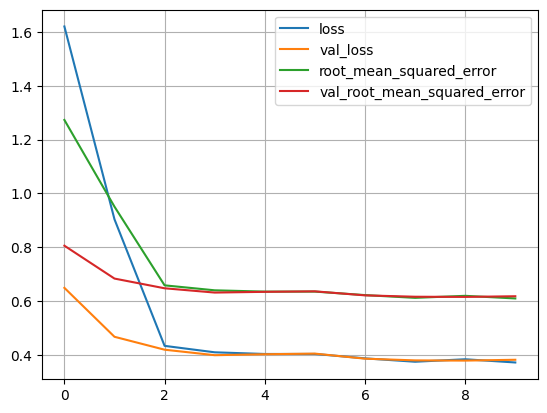

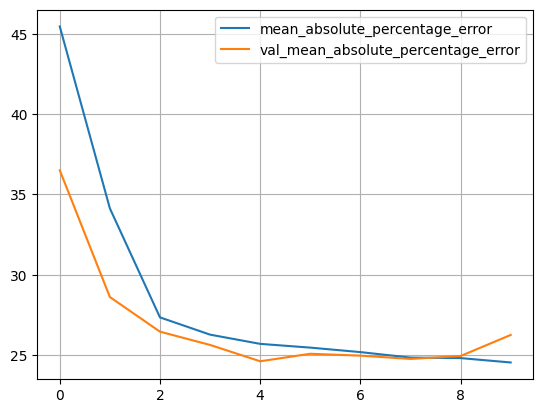

In [9]:
# Graficar el historial de entrenamiento
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)

In [10]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print('Evaluar el modelo en el conjunto de entrenamiento')
print('Loss train:', loss)
print('root_mean_squared_error error train:', RMSE)
print('mean_absolute_percentage_error train:', MAPE)

# Evaluar el modelo en el conjunto de validacion
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print('Evaluar el modelo en el conjunto de validacion')
print('Loss valid:', loss)
print('root_mean_squared_error error valid:', RMSE)
print('mean_absolute_percentage_error valid:', MAPE)

# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print('Evaluar el modelo en el conjunto de prueba')
print('Loss test:', loss)
print('root_mean_squared_error test:', RMSE)
print('mean_absolute_percentage_error test:', MAPE)

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3599 - mean_absolute_percentage_error: 26.1809 - root_mean_squared_error: 0.5997
Evaluar el modelo en el conjunto de entrenamiento
Loss train: 0.3698135316371918
root_mean_squared_error error train: 0.6081229448318481
mean_absolute_percentage_error train: 26.39983558654785
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3907 - mean_absolute_percentage_error: 25.6260 - root_mean_squared_error: 0.6246
Evaluar el modelo en el conjunto de validacion
Loss valid: 0.3813078701496124
root_mean_squared_error error valid: 0.6175013184547424
mean_absolute_percentage_error valid: 26.24692726135254
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3703 - mean_absolute_percentage_error: 26.5551 - root_mean_squared_error: 0.6083
Evaluar el modelo en el conjunto de prueba
Loss test: 0.3850232660770416
root_mean_squared_error test: 0.6205024123191833
mean_absolute_percentage_error test: 26.69739532470703
